<a href="https://colab.research.google.com/github/DanLangas/CursDL/blob/main/Laborator_02_05_11_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashin_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashin_mnist.load_data()
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
#semnificatia celor 10 valori de iesire
label_class = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
 'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [ ]:
for x in y_train[:10]:
  print(label_class[x])

Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover
Sneaker
Pullover
Sandal
Sandal


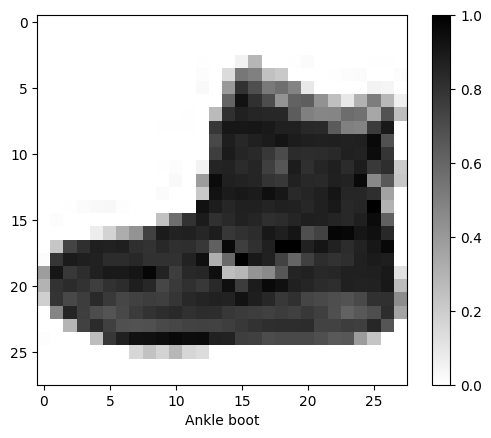

In [ ]:
plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.xlabel(label_class[y_train[0]])
plt.colorbar()
plt.grid(False)
plt.show()

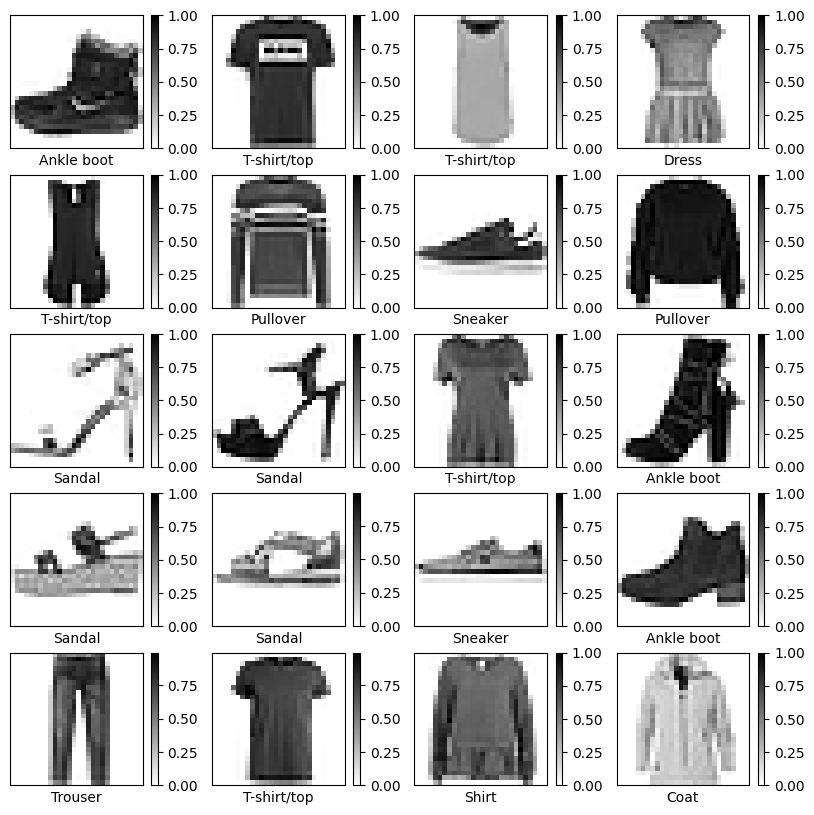

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(label_class[y_train[i]])
  plt.colorbar()
  plt.grid(False)
plt.show()

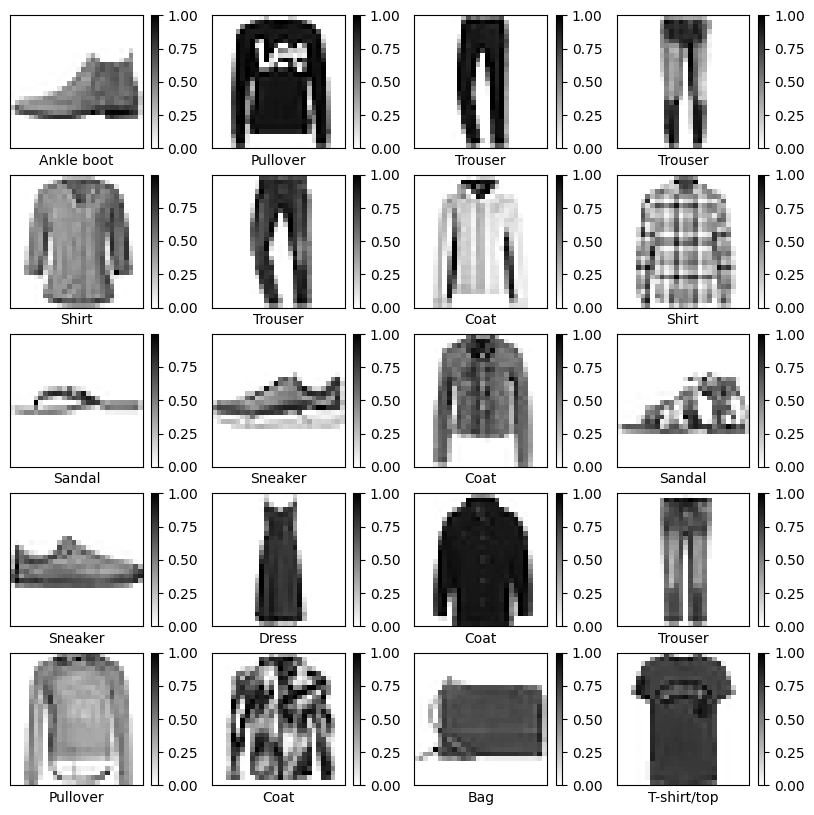

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[i], cmap=plt.cm.binary)
  plt.xlabel(label_class[y_test[i]])
  plt.colorbar()
  plt.grid(False)
plt.show()

Construire model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10) #10 categorii de obiecte
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compilarea modelului

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Antrenarea modelului

In [ ]:
#model.fit(x_train, y_train, epochs=5)
#model.fit(x_train, y_train, epochs=10)
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4996 - accuracy: 0.8244
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3725 - accuracy: 0.8656
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3358 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3123 - accuracy: 0.8846
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2957 - accuracy: 0.8909


Evaluarea modelului pe multimea de testare

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3423 - accuracy: 0.8779


[0.34234482049942017, 0.8779000043869019]

In [ ]:
history = model.fit(x_train, y_train, validation_split = 0.2, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2777 - accuracy: 0.8964 - val_loss: 0.2941 - val_accuracy: 0.8913
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2669 - accuracy: 0.9011 - val_loss: 0.2755 - val_accuracy: 0.8984
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2553 - accuracy: 0.9048 - val_loss: 0.2807 - val_accuracy: 0.8962
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2445 - accuracy: 0.9077 - val_loss: 0.2669 - val_accuracy: 0.9035
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2340 - accuracy: 0.9121 - val_loss: 0.2847 - val_accuracy: 0.8973


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3379 - accuracy: 0.8836


[0.33792200684547424, 0.8835999965667725]

dropout


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split = 0.2, epochs=10) # compilare si antrenare noua

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5581 - accuracy: 0.8030 - val_loss: 0.4402 - val_accuracy: 0.8418
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4122 - accuracy: 0.8504 - val_loss: 0.3707 - val_accuracy: 0.8679
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3732 - accuracy: 0.8643 - val_loss: 0.3605 - val_accuracy: 0.8700
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3514 - accuracy: 0.8709 - val_loss: 0.3701 - val_accuracy: 0.8658
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3363 - accuracy: 0.8749 - val_loss: 0.3355 - val_accuracy: 0.8788
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3251 - accuracy: 0.8798 - val_loss: 0.3264 - val_accuracy: 0.8817
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3102 - accuracy: 0.8850 - val_loss: 0.3377 - val_accuracy:

In [ ]:
history_dict= history.history

In [ ]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
loss = history_dict['loss']
loss
val_loss = history_dict['val_loss']
val_loss

[0.4402490258216858,
 0.37070682644844055,
 0.36052820086479187,
 0.3700815737247467,
 0.33549782633781433,
 0.3263762593269348,
 0.3377249240875244,
 0.3297211229801178,
 0.32185858488082886,
 0.31676143407821655]

In [ ]:
epochs = range(1,len(loss)+1)
epochs

range(1, 11)

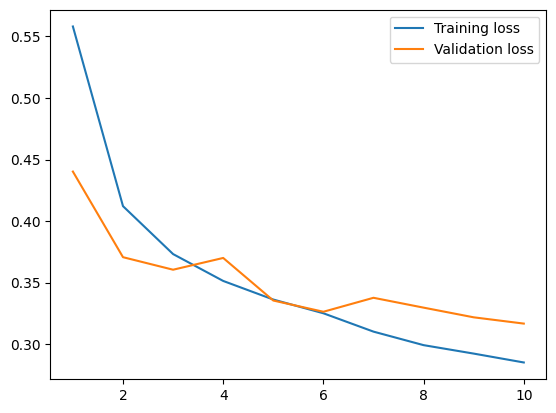

In [ ]:
plt.plot(epochs, loss, label = 'Training loss')
plt.plot(epochs, val_loss, label = 'Validation loss')
plt.legend()

In [ ]:
model.evaluate(x_test,y_test) # reeveluare

313/313 [==============================] - 1s 2ms/step - loss: 0.3497 - accuracy: 0.8729


[0.34968435764312744, 0.8729000091552734]

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# verificarea predictiilor
# Definim functii care sa reprezinte grafic imaginile si predictiile corespunzatoare
# functie pentru reprezentarea imaginii
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
      color = 'red'

  plt.xlabel(" {:2.0f}% ()".format(100*np.max(predictions_array),color=color))

  # functie pentru reprezentarea predictiilor
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

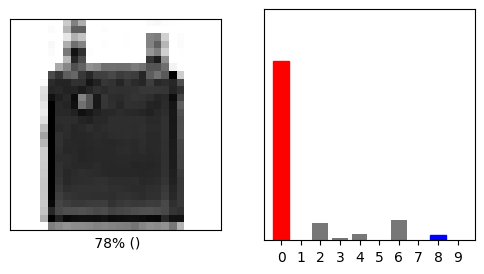

In [ ]:
i = 529
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
j +=2
plot_value_array(i, predictions[i], y_test)
plt.show()


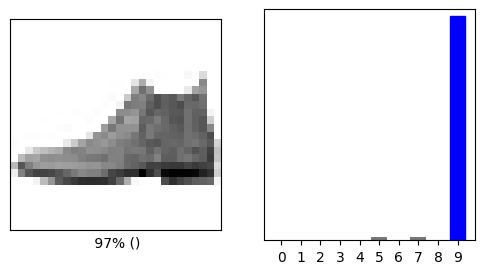

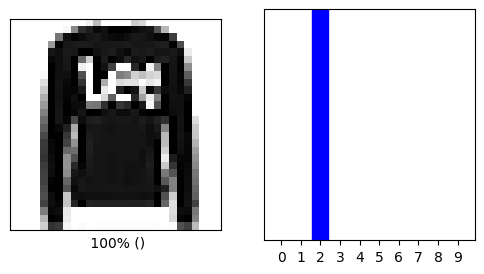

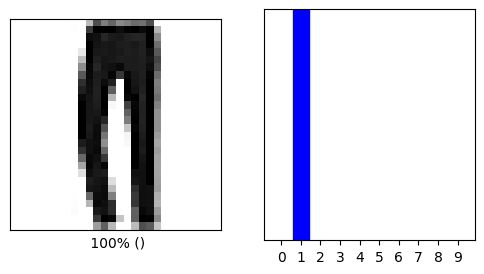

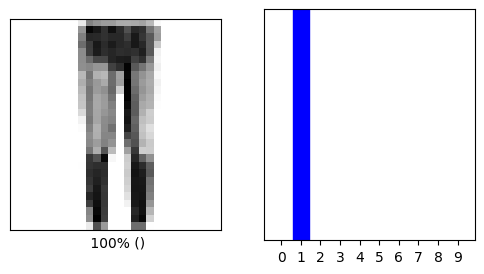

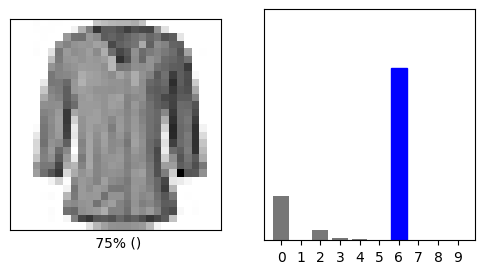

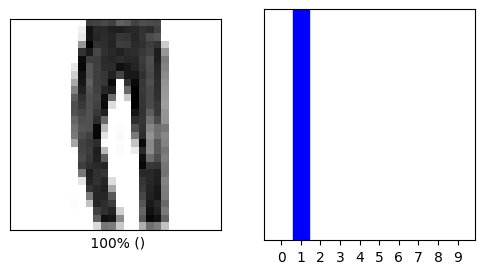

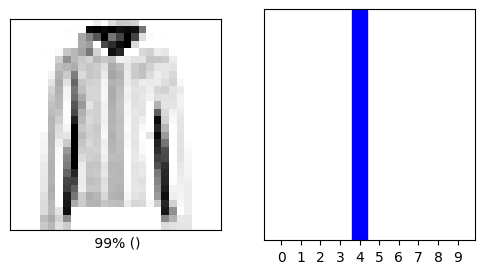

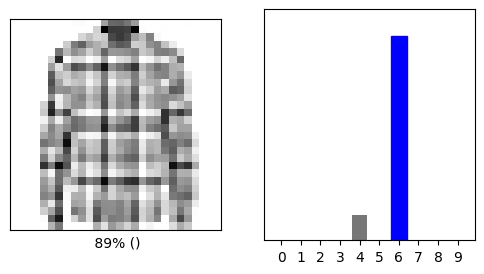

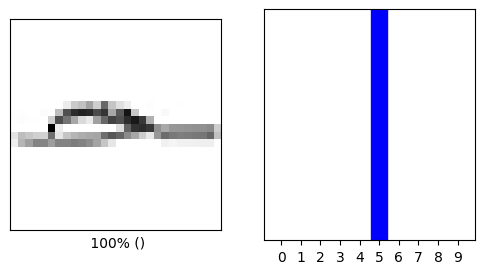

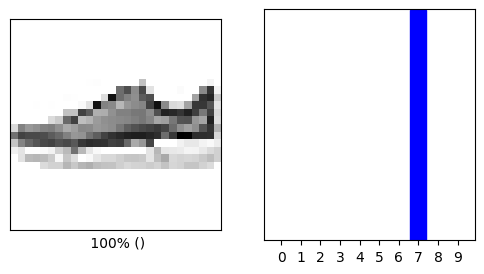

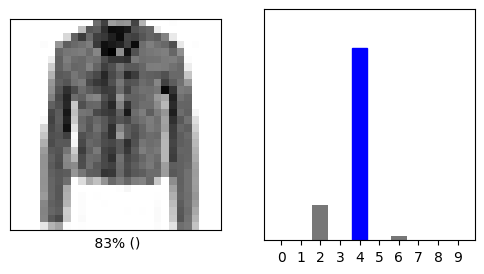

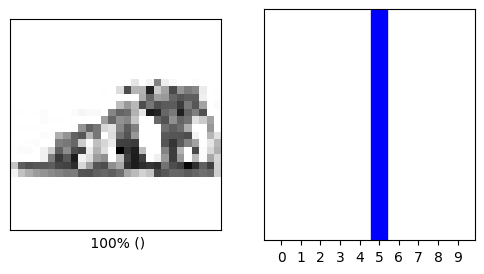

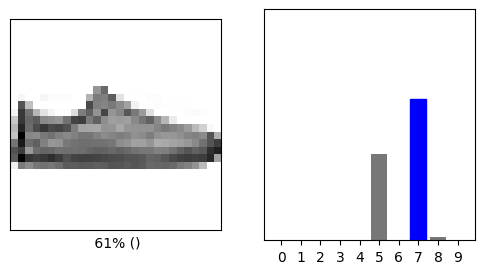

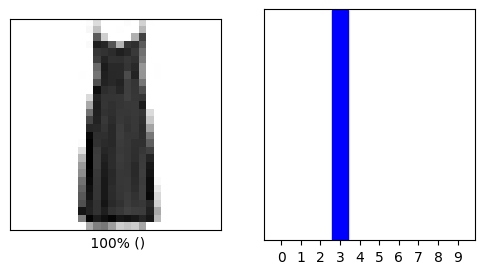

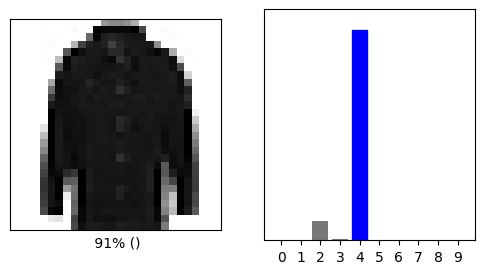

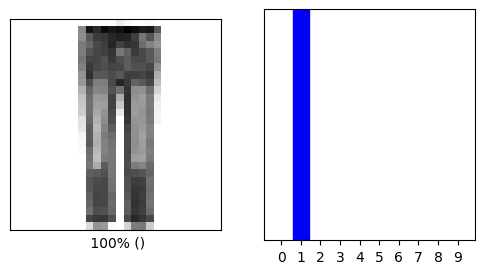

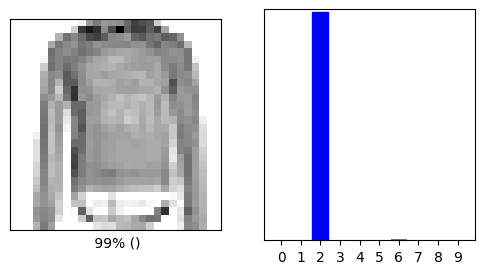

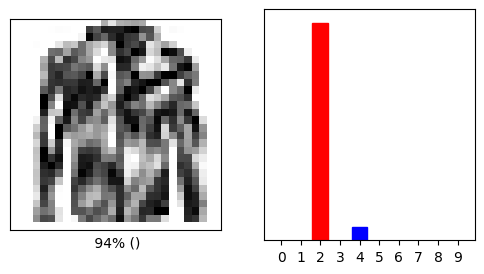

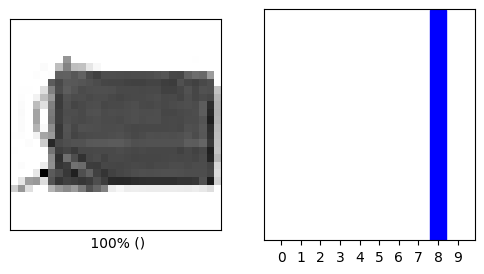

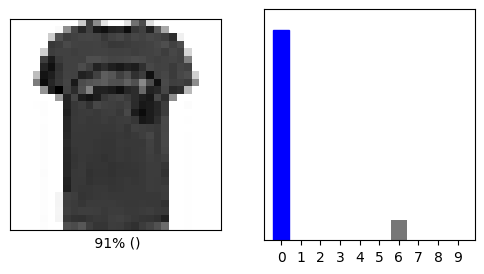

In [ ]:
j = 0
for i in range(20):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(1,2,2)
  j +=2
  plot_value_array(i, predictions[i], y_test)
  plt.show()